## Load fill and beam modes

In [1]:
%pylab notebook
import pytimber
import datetime
import pagestore
import time, calendar

Populating the interactive namespace from numpy and matplotlib


In [2]:
filln=4855

mdb=pytimber.LoggingDB(source='mdb')
# db=pagestore.PageStore('/afs/cern.ch/user/n/nbiancac/scratch0/Python-scripts/LHCMeasurementTools/lhc.db','//afs/cern.ch/user/n/nbiancac/ln_work/scratch0/MD')    
db=pagestore.PageStore('/home/nick/HDD/Work/Python-scripts/LHCMeasurementTools/lhc.db','/home/nick/HDD/Work/CERN/MD/LHC/DB/')    

ts1=mdb.getLHCFillData(fill_number=filln)['startTime']
ts2=mdb.getLHCFillData(fill_number=filln)['endTime']

print 'ts1 = '+time.strftime("%b %d %Y %H:%M:%S", time.localtime(ts1))
print 'ts2 = '+time.strftime("%b %d %Y %H:%M:%S", time.localtime(ts2))

ts1 = Apr 23 2016 19:37:45
ts2 = Apr 23 2016 22:59:32


### Getting data from Timber and stored in Pagestore

In [ ]:
# BCT
import LHC_BCT
data=mdb.get(LHC_BCT.variable_list(beams=[1,2]),ts1,ts2)
db.store(data)

In [ ]:
# BBQ
import LHC_BBQ
data=mdb.get(LHC_BBQ.variable_list(beams=[1,2]),ts1,ts2)
db.store(data)

In [ ]:
# BBQ RAW
import LHC_BBQ
times=linspace(ts1,ts2,40)
for ii in np.arange(1,len(times)-1):
    data=mdb.get(LHC_BBQ.variable_list_RAW(beams=[1]),times[ii],times[ii+1])
    db.store(data)

In [ ]:
# BSRT
import LHC_BSRT
for ii in np.arange(len(times)-1):
    data=mdb.get(LHC_BSRT.variable_list(beams=[1,2]),times[ii],times[ii+1])
    db.store(data)

In [ ]:
# BQM
import LHC_BQM
data=mdb.get(LHC_BQM.variable_list(beams=[1,2]),ts1,ts2)
db.store(data)

In [ ]:
# FBCT
times=linspace(ts1,ts2,40)
for ii in np.arange(len(times)-1):
    data=mdb.get(LHC_FBCT.variable_list(beams=[1,2]),times[ii],times[ii+1])
    db.store(data)

In [ ]:
# Energy
import LHC_Energy
data=mdb.get(LHC_Energy.variable_list(beams=[1,2]),ts1,ts2)
db.store(data)

In [ ]:
import LHC_Coll
data=mdb.get(LHC_Coll.variable_list(beam=1),ts1,ts2)
db.store(data)
data=mdb.get(LHC_Coll.variable_list(beam=2),ts1,ts2)
db.store(data)

### Retrieve data from database and start analysis

In [59]:
import LHC_BBQ, LHC_BCT, LHC_Energy, LHC_Coll, LHC_BQM, LHC_BSRT, LHC_FBCT

output_path='/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/TCSG6.0s_MD/'
tag='TCSG_6.0s_scan'
beam=2
ts1 = calendar.timegm(time.strptime("2016-04-23 22:00:00","%Y-%m-%d %H:%M:%S"))-2*3600
ts2 = calendar.timegm(time.strptime("2016-04-23 22:50:00","%Y-%m-%d %H:%M:%S"))-2*3600



In [111]:
len(sigma_v.t_str)

2273

In [113]:
reload(LHC_BSRT)
data=db.get(LHC_BSRT.variable_list(beams=[beam]),ts1,ts2)

import TimberManager as tm

varlist = LHC_BSRT.variable_list(beams=[beam])
print varlist
sigma_h = tm.timber_variable_list()
sigma_v = tm.timber_variable_list()
gate = tm.timber_variable_list()
sigma_h.t_stamps, sigma_h.values = data[varlist[0]]
sigma_v.t_stamps, sigma_v.values = data[varlist[1]]
sigma_v.t_str=[datetime.datetime.fromtimestamp(sigma_v.t_stamps[ii]) for ii in np.arange(len(sigma_v.t_stamps))]
gate.t_stamps, gate.values = data[varlist[2]]

dict_timber={}
dict_timber[varlist[0]]=sigma_h
dict_timber[varlist[1]]=sigma_v
dict_timber[varlist[2]]=gate
BSRT=LHC_BSRT.BSRT(dict_timber,beam=beam)



['LHC.BSRT.5L4.B2:FIT_SIGMA_H', 'LHC.BSRT.5L4.B2:FIT_SIGMA_V', 'LHC.BSRT.5L4.B2:GATE_DELAY']
expanding 0.0%


calc. emitt. 0.0%
calc. emitt. 14.7%
calc. emitt. 29.3%
calc. emitt. 44.0%
calc. emitt. 58.7%
calc. emitt. 73.3%
calc. emitt. 88.0%


<IPython.core.display.Javascript object>


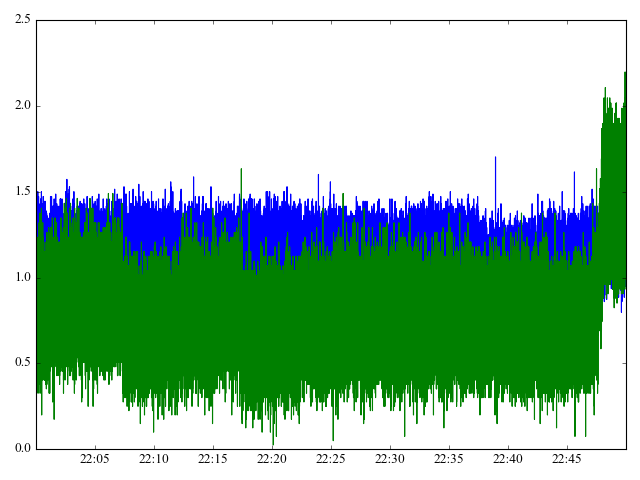

In [61]:
# Energy
reload(LHC_Energy)
data=db.get(LHC_Energy.variable_list(beams=[beam]),ts1,ts2)
Energy = LHC_Energy.energy(data, beam = beam)
LHC_Energy.variable_list(beams=[beam])

BSRT.calculate_emittances(Energy)
figure()

plot(BSRT.t_str,BSRT.norm_emit_v)
plot(BSRT.t_str,BSRT.norm_emit_h)
hfmt = DateFormatter('%H:%M')
gca().xaxis.set_major_formatter(hfmt)
tight_layout()

<IPython.core.display.Javascript object>


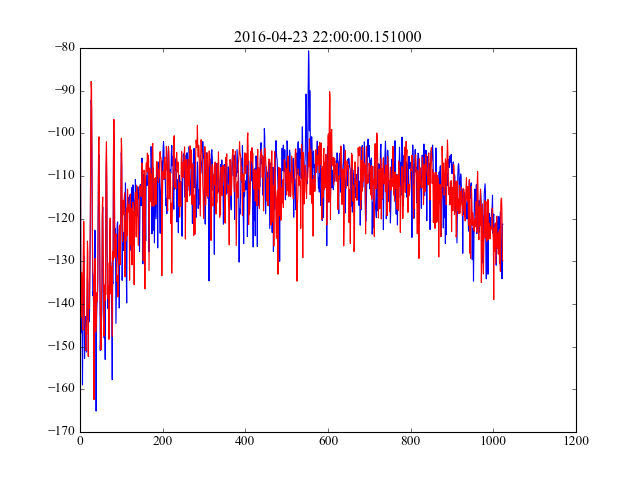

<IPython.core.display.Javascript object>


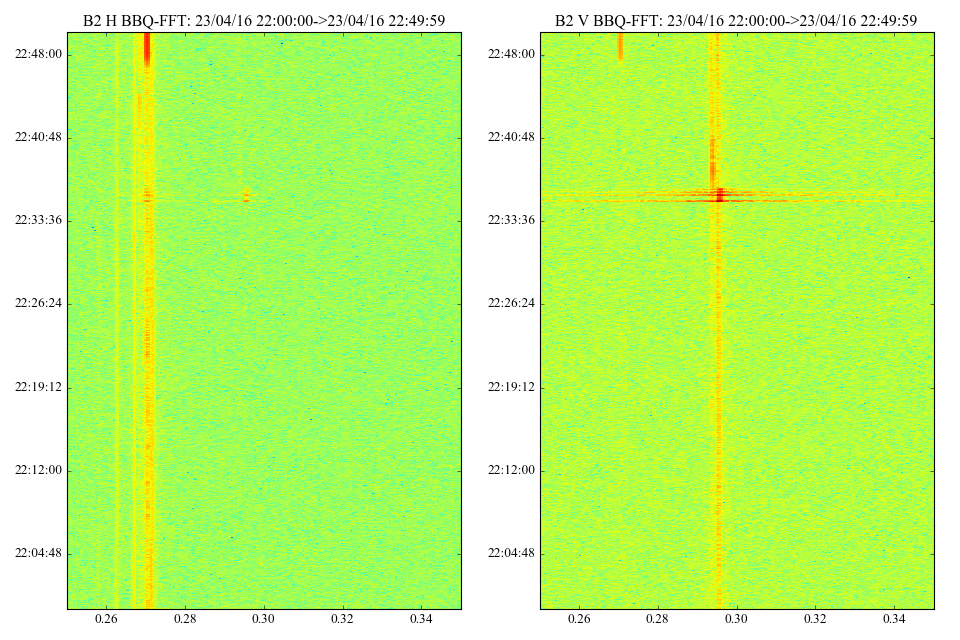

In [62]:
# BBQ
data=db.get(LHC_BBQ.variable_list(beams=[beam]),ts1,ts2)
BBQ=LHC_BBQ.BBQ(data,beam=beam)
BBQ_FFT=LHC_BBQ.BBQ_FFT(data,beam=beam)
del data

figure()
plot( (BBQ_FFT.fft_h[0]), "-" )
plot( (BBQ_FFT.fft_v[0]), "-r" )
title(BBQ_FFT.t_str[0])

# Waterfall
figure(figsize=(12,8))
subplot(121)
mindate = mpl.dates.date2num(BBQ_FFT.t_str[0])
maxdate = mpl.dates.date2num(BBQ_FFT.t_str[-1])
img = plt.imshow(BBQ_FFT.fft_h, origin='lower', cmap='jet', interpolation='nearest', aspect='auto',
                extent=(0, 0.5, mindate, maxdate))

hfmt = DateFormatter('%H:%M:%S')
gca().yaxis.set_major_formatter(hfmt)

title('B%d H BBQ-FFT: '%BBQ_FFT.beam +
    str(BBQ_FFT.t_str[0].strftime('%d/%m/%y %H:%M:%S')) +'->'+
      str(BBQ_FFT.t_str[-1].strftime('%d/%m/%y %H:%M:%S')))

xlim(0.25, 0.35)

subplot(122)
mindate = mpl.dates.date2num(BBQ_FFT.t_str[0])
maxdate = mpl.dates.date2num(BBQ_FFT.t_str[-1])
img = plt.imshow(BBQ_FFT.fft_v, origin='lower', cmap='jet', interpolation='nearest', aspect='auto',
                extent=(0, 0.5, mindate, maxdate))

hfmt = DateFormatter('%H:%M:%S')
gca().yaxis.set_major_formatter(hfmt)

title('B%d V BBQ-FFT: '%BBQ_FFT.beam +
    str(BBQ_FFT.t_str[0].strftime('%d/%m/%y %H:%M:%S')) +'->'+
      str(BBQ_FFT.t_str[-1].strftime('%d/%m/%y %H:%M:%S')))

xlim(0.25, 0.35)
tight_layout()

In [63]:
# RAW BBQ
data=db.get(LHC_BBQ.variable_list_RAW(beams=[beam]),ts1,ts2)
# db.store(data)
BBQ_RAW=LHC_BBQ.BBQG_RAW(data,beam=beam)
# data

array([ 0.378,  0.386,  0.379,  0.381,  0.385,  0.381,  0.38 ,  0.386,
        0.38 ,  0.393,  0.373,  0.378,  0.382,  0.391,  0.384,  0.384,
        0.392,  0.393,  0.378,  0.383,  0.384,  0.378,  0.374,  0.387,
        0.376,  0.382,  0.38 ,  0.392,  0.376,  0.374])

<IPython.core.display.Javascript object>


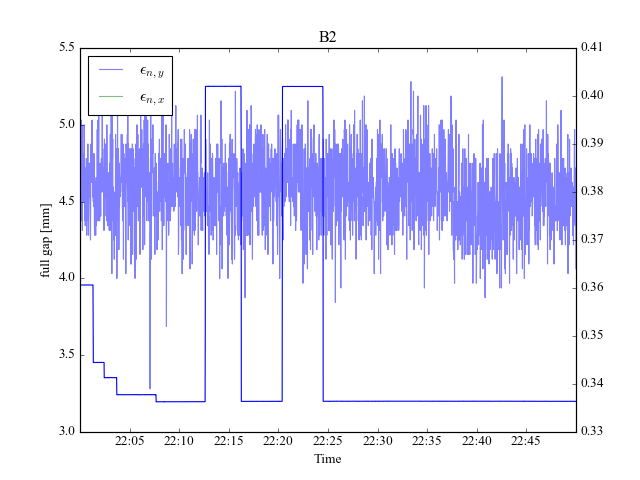

In [112]:

# Collimators
data=db.get(LHC_Coll.variable_list(beam),ts1,ts2)

Coll=LHC_Coll.Coll(data,beam=beam)
typecoll=['R','L']
Coll.select_coll('TCSG.A4'+typecoll[beam-1]+'7.B'+str(beam)+':MEAS_LVDT_GU')

N= 1

figure()
ax1 = subplot(111)
h0, = ax1.plot(Coll.t_str, Coll.values, "-b")
xlabel("Time")
ylabel("full gap [mm]")
title('B%d'%(beam))

ax2=ax1.twinx()
h1, = ax2.plot(BSRT.t_str,np.convolve(BSRT.norm_emit_v,np.ones(N),mode='same'),alpha=0.5)
h2, = ax2.plot(BSRT.t_str,np.convolve(BSRT.norm_emit_h,np.ones(N),mode='same'),alpha=0.5)
legend([h1,h2],['$\epsilon_{n,y}$','$\epsilon_{n,x}$'],loc=2)


xfmt = mpl.dates.DateFormatter('%H:%M')
gca().xaxis.set_major_formatter(xfmt)

<IPython.core.display.Javascript object>


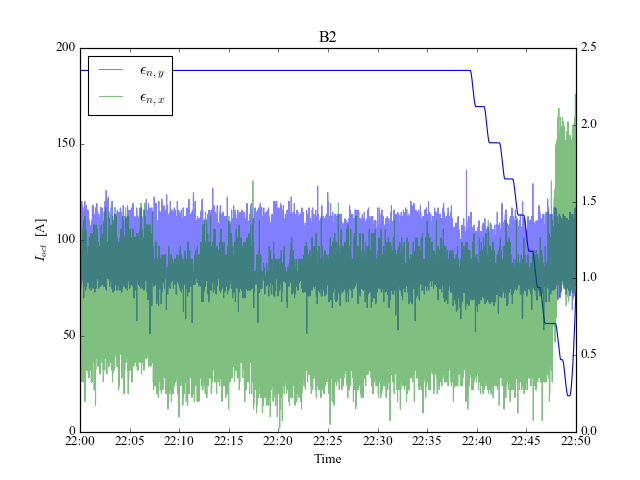

In [97]:
# Octupole
# data=mdb.get('RPMBB%ROF.A81B1:I_MEAS',ts1,ts2)
# db.store(data)

data=db.get('RPMBB%ROF.A81B'+str(beam)+':I_MEAS',ts1,ts2)
tt, vv = data['RPMBB.RR13.ROF.A81B'+str(beam)+':I_MEAS']

oct_time_str=[datetime.datetime.fromtimestamp(tt[ii]) for ii in np.arange(len(tt))]

N=1

figure()
ax1 = subplot(111)
h0, = ax1.plot(oct_time_str, vv, "-b")
xlabel("Time")
ylabel("$I_{oct}$  [A]")
title('B%d'%(beam))

ax2=ax1.twinx()
h1, = ax2.plot(BSRT.t_str,np.convolve(BSRT.norm_emit_v,np.ones(N),mode='same'),alpha=0.5)
h2, = ax2.plot(BSRT.t_str,np.convolve(BSRT.norm_emit_h,np.ones(N),mode='same'),alpha=0.5)
legend([h1,h2],['$\epsilon_{n,y}$','$\epsilon_{n,x}$'],loc=2)

xfmt = mpl.dates.DateFormatter('%H:%M')
gca().xaxis.set_major_formatter(xfmt)

<IPython.core.display.Javascript object>


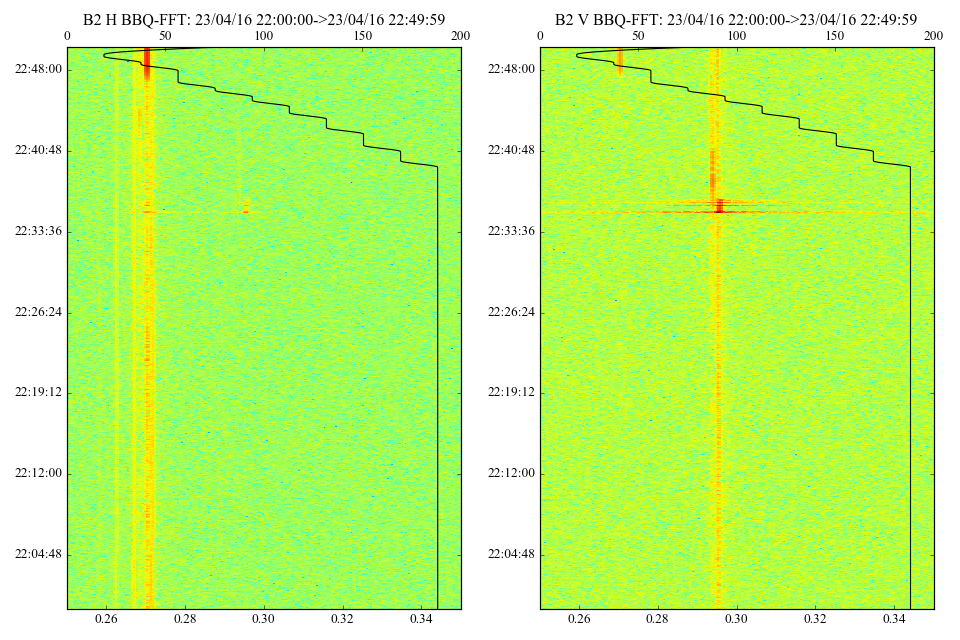

In [95]:
# Octupole and Waterfall
figure(figsize=(12,8))
ax1 = subplot(121)
mindate = mpl.dates.date2num(BBQ_FFT.t_str[0])
maxdate = mpl.dates.date2num(BBQ_FFT.t_str[-1])
img = plt.imshow(BBQ_FFT.fft_h, origin='lower', cmap='jet', interpolation='nearest', aspect='auto',
                extent=(0, 0.5, mindate, maxdate))

hfmt = DateFormatter('%H:%M:%S')
gca().yaxis.set_major_formatter(hfmt)

title('B%d H BBQ-FFT: '%BBQ_FFT.beam +
    str(BBQ_FFT.t_str[0].strftime('%d/%m/%y %H:%M:%S')) +'->'+
      str(BBQ_FFT.t_str[-1].strftime('%d/%m/%y %H:%M:%S')), y=1.03)

xlim(0.25, 0.35)
ax2= ax1.twiny()
ax2.plot(vv, oct_time_str,"-k")
ax2.set_ylim(oct_time_str[0], oct_time_str[-1])


ax1 = subplot(122)
mindate = mpl.dates.date2num(BBQ_FFT.t_str[0])
maxdate = mpl.dates.date2num(BBQ_FFT.t_str[-1])
img = plt.imshow(BBQ_FFT.fft_v, origin='lower', cmap='jet', interpolation='nearest', aspect='auto',
                extent=(0, 0.5, mindate, maxdate))

hfmt = DateFormatter('%H:%M:%S')
gca().yaxis.set_major_formatter(hfmt)


xlim(0.25, 0.35)
ax2= ax1.twiny()
ax2.plot(vv, oct_time_str,"-k")
ax2.set_ylim(oct_time_str[0], oct_time_str[-1])
title('B%d V BBQ-FFT: '%BBQ_FFT.beam +
    str(BBQ_FFT.t_str[0].strftime('%d/%m/%y %H:%M:%S')) +'->'+
      str(BBQ_FFT.t_str[-1].strftime('%d/%m/%y %H:%M:%S')), y=1.03)

tight_layout()


<IPython.core.display.Javascript object>


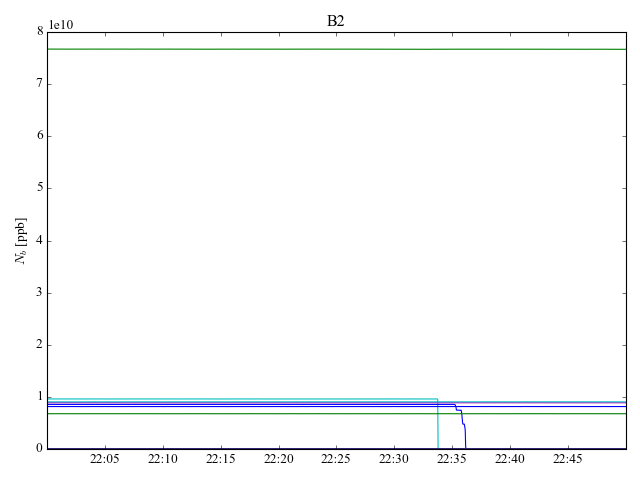

In [88]:
# FBCT
reload(LHC_FBCT)
data=db.get(LHC_FBCT.variable_list(beams=[beam]),ts1,ts2)
    
FBCT = LHC_FBCT.FBCT(data,beam=beam, device = 'B')
figure()
plot(FBCT.t_str,FBCT.bint)
title('B'+str(beam))
ylabel('$N_b$ [ppb]')
xfmt = mpl.dates.DateFormatter('%H:%M')
gca().xaxis.set_major_formatter(xfmt)

tight_layout()


<IPython.core.display.Javascript object>


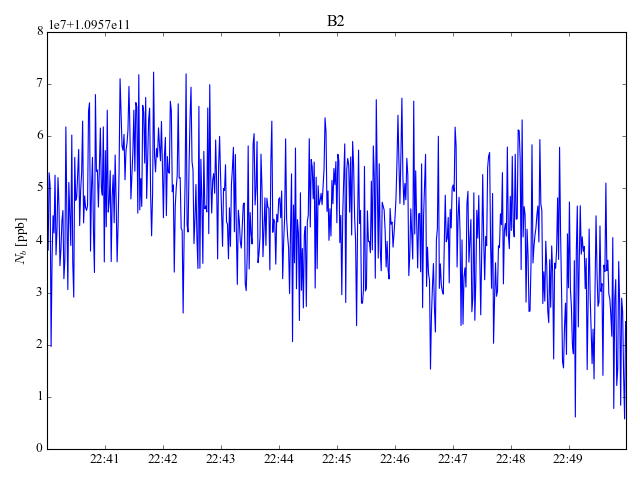

In [55]:
figure()
plot(FBCT.t_str,FBCT.totint)
title('B'+str(beam))
ylabel('$N_b$ [ppb]')
xfmt = mpl.dates.DateFormatter('%H:%M')
gca().xaxis.set_major_formatter(xfmt)

tight_layout()

###  Sussix

In [69]:
import PySUSSIX as ps

# Sussix settings
nt1=1; nt2=4096;
nharm = 5
moden=-1

if moden == 0:
    # Windows for mode 0
    [tunex_min, tunex_max] = [0.2688 , 0.2710]
    [tuney_min, tuney_max] = [0.2941 , 0.2964]
elif moden == -1:
    # Windows for mode -1
    [tunex_min, tunex_max] = [0.2686 , 0.2680]
    [tuney_min, tuney_max] = [0.2930 , 0.2937]

tunex0 = np.mean(np.array([tunex_min, tunex_max]))
tuney0 = np.mean(np.array([tuney_min, tuney_max]))
ex0 = 1e-3
ey0 = 1e-3

ay_vec=[];ax_vec=[]; tuney_vec=[];tunex_vec=[];
spec_ax=[]; spec_ay=[]; spec_ox=[]; spec_oy=[]; time_stamps=[];

for ii in np.arange(0, len(BBQ_RAW.v)):
    
    datax=BBQ_RAW.h[ii][nt1:nt2]-np.mean(BBQ_RAW.h[ii][nt1:nt2])
    datay=BBQ_RAW.v[ii][nt1:nt2]-np.mean(BBQ_RAW.v[ii][nt1:nt2])
    spec=ps.Sussix()
    spec.sussix_inp(nt1=nt1,nt2=nt2,tunex=tunex0,tuney=tuney0,ex=ex0,ey=ey0,ir=1,nharm=nharm)
    spec.sussix(datax,0*datax, 
                datay, 0*datay, 
                0*datax, 0*datay)
    
    del datax, datay
    
    spec.ox=np.abs(spec.ox)
    spec.oy=np.abs(spec.oy)
    
    spec_ox.append(spec.ox[0:nharm-1])
    spec_oy.append(spec.oy[0:nharm-1])
    spec_ax.append(spec.ax[0:nharm-1])
    spec_ay.append(spec.ay[0:nharm-1])
    
    time_stamps.append(np.random.normal(0.,1e-5,nharm-1)+BBQ_RAW.t_stamps[ii])
    
    rangey=np.array([tuney_min, tuney_max])
    spec.oy=spec.oy[np.where((np.abs(spec.oy) < rangey.max()) & (np.abs(spec.oy) > rangey.min()))]
    spec.ay=spec.ay[np.where((np.abs(spec.oy) < rangey.max()) & (np.abs(spec.oy) > rangey.min()))]

    rangex=np.array([tunex_min, tunex_max])
    spec.ox=spec.ox[np.where((np.abs(spec.ox) < rangex.max()) & (np.abs(spec.ox) > rangex.min()))]
    spec.ax=spec.ax[np.where((np.abs(spec.ox) < rangex.max()) & (np.abs(spec.ox) > rangex.min()))]
    
    if len(spec.ay):
        tuney=spec.oy[spec.ay.argmax()]
        ay=spec.ay[spec.ay.argmax()]
    else:
        tuney=np.NaN
        ay=np.NaN
    
    if len(spec.ax):
        tunex=spec.ox[spec.ax.argmax()]
        ax=spec.ax[spec.ax.argmax()]
    else:
        tunex=np.NaN
        ax=np.NaN
    
    tunex_vec.append(tunex)
    tuney_vec.append(tuney)
    ax_vec.append(ax)
    ay_vec.append(ay)

BBQ_RAW.qh=np.array(tunex_vec)
BBQ_RAW.qv=np.array(tuney_vec)
BBQ_RAW.ah=np.array(ax_vec)
BBQ_RAW.av=np.array(ay_vec)

<IPython.core.display.Javascript object>


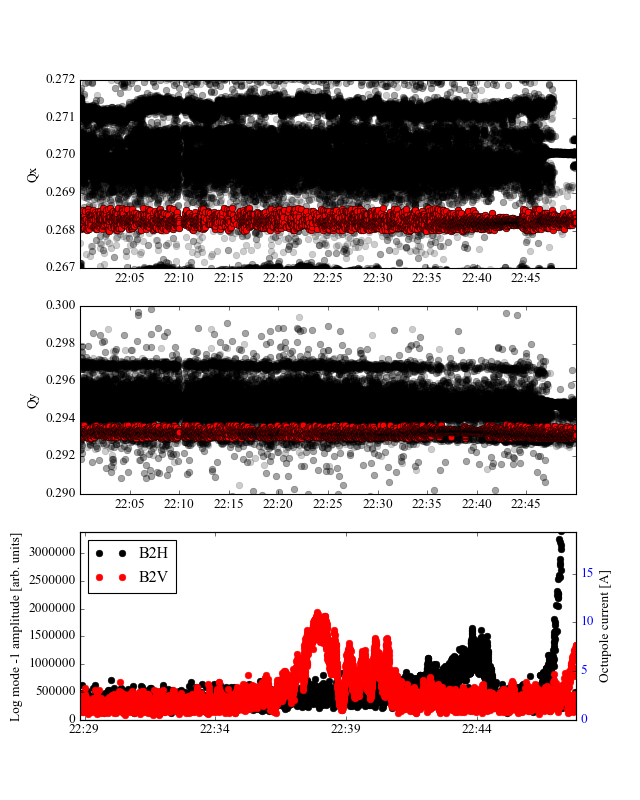

In [71]:
time_stamps=np.reshape(time_stamps,-1,1)
time_str=[datetime.datetime.fromtimestamp(time_stamps[ii]) for ii in np.arange(len(time_stamps))]
spec_ox=np.reshape(spec_ox,-1,1)
spec_oy=np.reshape(spec_oy,-1,1)
spec_ax=np.reshape(spec_ax,-1,1)
spec_ay=np.reshape(spec_ay,-1,1)

# plot tunes
figure(figsize=(8,10))
subplot(3,1,1)
plot(time_str,spec_ox, 'ok',alpha=0.2,markerfacecolor='k',markeredgecolor='k')
plot(BBQ_RAW.t_str, BBQ_RAW.qh,'or')
ylabel('Qx')
ylim(0.267 , 0.272)
xfmt = mpl.dates.DateFormatter('%H:%M')
gca().xaxis.set_major_formatter(xfmt)

subplot(3,1,2)
plot(time_str,spec_oy,'ok',alpha=0.2,markerfacecolor='k',markeredgecolor='k')
plot(BBQ_RAW.t_str,BBQ_RAW.qv,'or')
ylabel('Qy')
ylim(0.290 ,0.3)
xfmt = mpl.dates.DateFormatter('%H:%M')
gca().xaxis.set_major_formatter(xfmt)

# plot amplitude of selected line
ax1 = subplot(3,1,3)
ax1.plot(BBQ_RAW.t_str, BBQ_RAW.ah,'ok',markeredgecolor='k')
ax1.plot(BBQ_RAW.t_str,BBQ_RAW.av,'or',markeredgecolor='r')
legend(['B'+str(beam)+'H','B'+str(beam)+'V'], loc=2)
# ylim(0.290 ,0.3)
xfmt = mpl.dates.DateFormatter('%H:%M')
gca().xaxis.set_major_formatter(xfmt)
ylabel('Log mode -1 amplitude [arb. units]')

ax2 = ax1.twinx()
ax2.plot(oct_time_str,vv, '-b')
for tl in ax2.get_yticklabels():
    tl.set_color('b')
ylabel('Octupole current [A]')
# tight_layout()

<IPython.core.display.Javascript object>


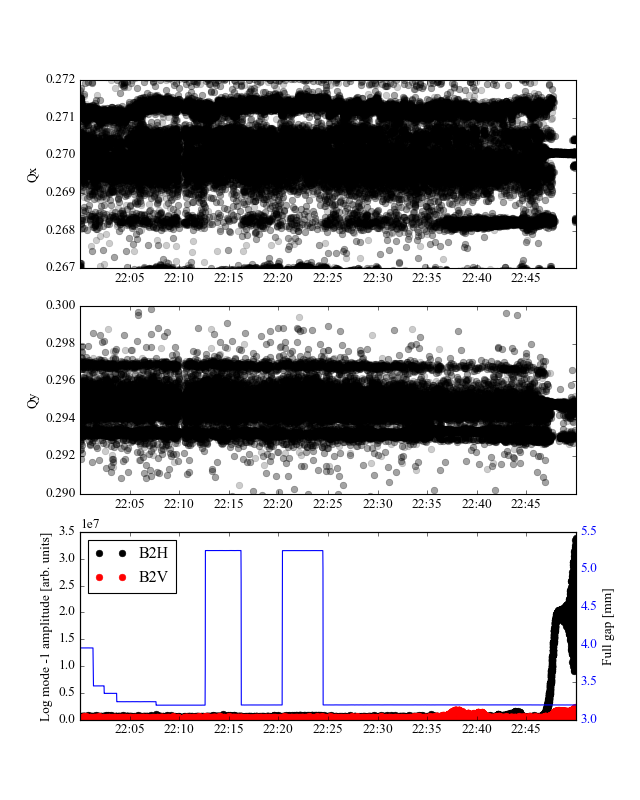

In [68]:
time_stamps=np.reshape(time_stamps,-1,1)
time_str=[datetime.datetime.fromtimestamp(time_stamps[ii]) for ii in np.arange(len(time_stamps))]
spec_ox=np.reshape(spec_ox,-1,1)
spec_oy=np.reshape(spec_oy,-1,1)
spec_ax=np.reshape(spec_ax,-1,1)
spec_ay=np.reshape(spec_ay,-1,1)

# plot tunes
figure(figsize=(8,10))
subplot(3,1,1)
plot(time_str,spec_ox, 'ok',alpha=0.2,markerfacecolor='k',markeredgecolor='k')
# plot(BBQ_RAW.t_str, BBQ_RAW.qh,'or')
ylabel('Qx')
ylim(0.267 , 0.272)
xfmt = mpl.dates.DateFormatter('%H:%M')
gca().xaxis.set_major_formatter(xfmt)

subplot(3,1,2)
plot(time_str,spec_oy,'ok',alpha=0.2,markerfacecolor='k',markeredgecolor='k')
# plot(BBQ_RAW.t_str,BBQ_RAW.qv,'or')
ylabel('Qy')
ylim(0.290 ,0.3)
xfmt = mpl.dates.DateFormatter('%H:%M')
gca().xaxis.set_major_formatter(xfmt)

# plot amplitude of selected line
ax1 = subplot(3,1,3)
ax1.plot(BBQ_RAW.t_str, BBQ_RAW.ah,'ok',markeredgecolor='k')
ax1.plot(BBQ_RAW.t_str,BBQ_RAW.av,'or',markeredgecolor='r')
legend(['B'+str(beam)+'H','B'+str(beam)+'V'], loc=2)
# ylim(0.290 ,0.3)
xfmt = mpl.dates.DateFormatter('%H:%M')
gca().xaxis.set_major_formatter(xfmt)
ylabel('Log mode -1 amplitude [arb. units]')

ax2 = ax1.twinx()
ax2.plot(Coll.t_str,Coll.values, '-b')
for tl in ax2.get_yticklabels():
    tl.set_color('b')
ylabel('Full gap [mm]')
# tight_layout()

###  Fit rise time

<IPython.core.display.Javascript object>


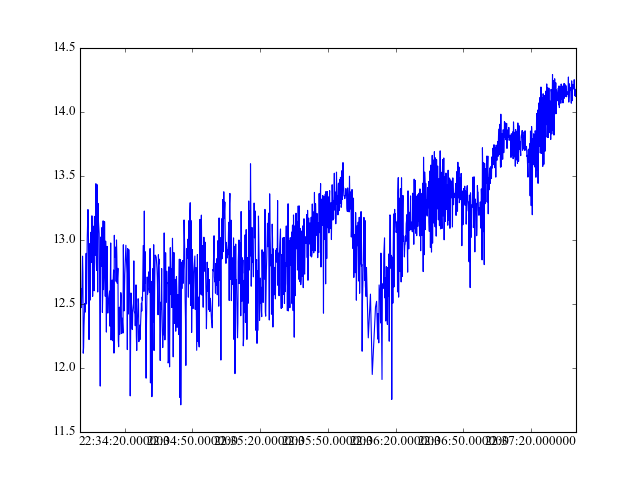

<IPython.core.display.Javascript object>


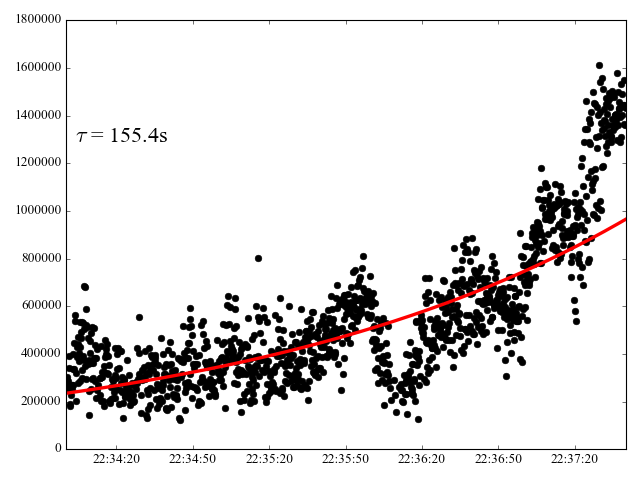

In [94]:
fit_ts1 = calendar.timegm(time.strptime("2016-04-23 22:34:00","%Y-%m-%d %H:%M:%S"))-2*3600
fit_ts2 = calendar.timegm(time.strptime("2016-04-23 22:37:40","%Y-%m-%d %H:%M:%S"))-2*3600
fit_select = np.where((BBQ_RAW.t_stamps > fit_ts1)&(BBQ_RAW.t_stamps < fit_ts2))

fit_time_stamps = time_stamps[fit_select]
fit_ay = BBQ_RAW.av[fit_select]

fit_select=np.where(~np.isnan(fit_ay))
fit_time_stamps = fit_time_stamps[fit_select]
fit_ay = fit_ay[fit_select]


p = np.polyfit(fit_time_stamps, np.log(fit_ay), 1)


fit_exp = np.exp(fit_time_stamps*p[0]+p[1])
fit_t_str=[datetime.datetime.fromtimestamp(fit_time_stamps[ii]) for ii in np.arange(len(fit_time_stamps))]

figure()
plot(fit_t_str, np.log(fit_ay))

figure()
plot(fit_t_str, fit_ay,'ok')
plot(fit_t_str, fit_exp,'-r',linewidth=3)
xfmt = mpl.dates.DateFormatter('%H:%M:%S')
gca().xaxis.set_major_formatter(xfmt)
tight_layout()

annotate(r'$\tau$ = %.1fs'%(1./p[0]),xy=(fit_t_str[20], 0.8*fit_ay.max()), size = 20)

###  Conversion for octupole currents

See https://indico.cern.ch/event/400761/contributions/1843701/attachments/802778/1100265/LCarver_LBOC.pdf

In [96]:
dQp1H= -1.5/376
dQp1V= +0.7/376
dQp2H= -2./376
dQp2V= +0.7/376
    
dIoct=188.-75.
Qpcorr = 6.92 + dIoct * dQp2V
print Qpcorr 

7.13037234043
